# ZIP

Fabrique un itérateur qui agrège sous forme de N-uplets (tuples) des objets itérables

In [1]:
a=[1,2,3]
neveux=['Riri', 'Fifi', 'Loulou']
couleurs=["Vert", "Rouge", "Bleu" ]
zipped = zip(a, neveux, couleurs)

In [2]:
zipped


In [3]:
zipped = list(zipped)

In [4]:
zipped

[(1, 'Riri', 'Vert'), (2, 'Fifi', 'Rouge'), (3, 'Loulou', 'Bleu')]

In [5]:
zipped[1]

(2, 'Fifi', 'Rouge')

In [6]:
zipped[0]=(1, 'Riri', 'Violet')
print(zipped)

[(1, 'Riri', 'Violet'), (2, 'Fifi', 'Rouge'), (3, 'Loulou', 'Bleu')]


In [7]:
unzipped = zip(*zipped)

In [8]:
unzipped

In [9]:
l1, l2, l3= unzipped

In [10]:
l1

(1, 2, 3)

In [11]:
l2

('Riri', 'Fifi', 'Loulou')

In [12]:
l3

('Violet', 'Rouge', 'Bleu')

In [13]:
zipped = zip(a, neveux, couleurs)
x,y,z = zipped

In [14]:
neveux=['Riri', 'Fifi']

In [15]:
resultat = zip(*zipped)
x,y,z = resultat
print(x,y,z)

ValueError: not enough values to unpack (expected 3, got 0)

In [16]:
print(list(resultat))

[]


In [17]:
listetest = [1,2,3]
listetest2 = ["a","b"]
monobj = zip(listetest, listetest2)
print(list(monobj),*monobj)


[(1, 'a'), (2, 'b')]


In [18]:
sortie = zip(*monobj)
print(type(sortie))
l1b, l2b = sortie
print(l1b, l2b)

<class 'zip'>


ValueError: not enough values to unpack (expected 2, got 0)

Les objets zip ne peuvent se dézipper qu'une seule fois !!!

In [19]:
zipped = zip(a, neveux, couleurs)
#zipped = list(zipped) #la transformation en liste permet quand à elle de reproduire plusieurs dézips
print(zipped)

l1,l2,l3 = zip(*zipped)
print(l1,l2,l3)

print(zipped)

l1,l2,l3 = zip(*zipped)
print(l1,l2,l3)

(1, 2) ('Riri', 'Fifi') ('Vert', 'Rouge')


ValueError: not enough values to unpack (expected 3, got 0)

## Exemple de performance de ZIP

Nous prendrons l'hypothèse de données d'un site de e-commerce qui nous fournit ses ventes sur une ou plusieurs années.

Par hypothèse, le service comptabilité est en mesure de nous fournir les charges journalières (salaire, coût de licence, achats, etc...)

Nous cherchons à calculer sur la même période le bénéfice de l'entreprise qui correspond à la somme des ventes à laquelle nous soustrayons les charges

### Etape 1 : Fabrication des données
Dans un cas réel nous aurions ces données et il y aurait bien entendu potentiellement un nettoyage à réaliser (journée à 0€ par exemple dimanche et jours fériés).
Pour simuler ses données nous fabriquons un set aléatoire:

- pour les ventes un set aléatoire entre 20€ et 300€
- pour les charges un fixe de 60€ (ex: loyer + électricité lissés) et des charges exceptionnelles aléatoire entre 10€ et 120€ (plusieurs salariés ou des achats exceptionnels)

In [20]:
import random
nbre_jours = 365 # 1 an
ventes = [random.randint(20,300)for i in range(nbre_jours)]
#print(ventes)
charges = [60 + random.randint(10,120)for i in range(nbre_jours)]
#print(charges)      

### Etape 2 : Calcul à la main du bénéfice sur la période

In [28]:
%%timeit

benefices = 0
for unjour in range(nbre_jours):
    benefices = benefices + ventes[unjour]-charges[unjour]

print(benefices)

12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
1265

### Etape 2 bis : Calcul identique via la fonction Zip

In [29]:
%%timeit

benefices = 0
for v,c in zip(ventes,charges):
    benefices = benefices + v - c
print(benefices)

12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
12651
1265

### Conclusion :
Nous aurons un gain de performance d'environ 25% en utilisant la fonction zip

In [23]:
#Gain de 30% de temps d'exécution
81.2/106

0.7660377358490567

### Bonus :
Une représentation graphique des ventes, charges et bénéfices

- pip install matplotlib
- conda install matplotlib

<IPython.core.display.Javascript object>


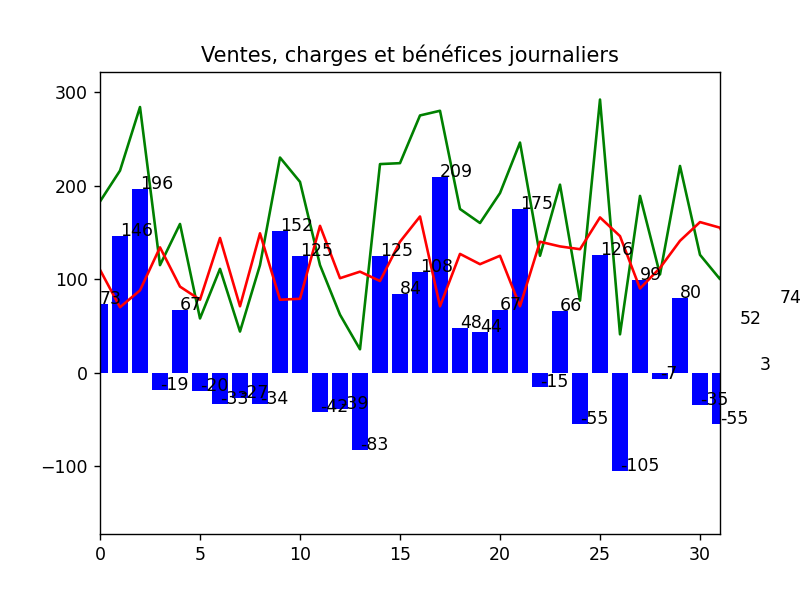

In [27]:
# importing matplotlib module
from matplotlib import pyplot as plt


# Magic command to zoom on datas
%matplotlib notebook 

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

# x-axis values
x = [i for i in range(len(ventes))]
 
# Function to plot
plt.title("Ventes, charges et bénéfices journaliers")
plt.plot(x, ventes, color = 'g')
plt.plot(x, charges, color = 'r')

benefices = []
for v,c in zip(ventes,charges):
    benefices.append(v - c)

plt.bar(x, benefices, color = 'b')

# calling the function to add value labels
#addlabels(x, ventes)
#addlabels(x, charges)
addlabels(x, benefices)

# zoom on first 31 days
plt.xlim(0, 31)

# function to show the plot
plt.show()